In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("finalTrain.csv")

df.head(2)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [3]:
df.shape

(45584, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

### Differentiate between categorical features and numerical features

In [5]:
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [6]:
num_features = [feature for feature in df.columns if feature not in cat_features]

In [7]:
df[cat_features]

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0xcdcd,DEHRES17DEL01,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,0xd987,KOCRES16DEL01,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,Metropolitian
2,0x2784,PUNERES13DEL03,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,0xdb64,KNPRES14DEL02,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,24-03-2022,11:35,11:45,Windy,High,Meal,motorcycle,No,Metropolitian
45580,0xd641,AGRRES16DEL01,16-02-2022,19:55,20:10,Windy,Jam,Buffet,motorcycle,No,Metropolitian
45581,0x4f8d,CHENRES08DEL03,11-03-2022,23:50,24:05:00,Cloudy,Low,Drinks,scooter,No,Metropolitian
45582,0x5eee,COIMBRES11DEL01,07-03-2022,13:35,13:40,Cloudy,High,Snack,motorcycle,No,Metropolitian


In [8]:
df[cat_features].isnull().sum()

ID                         0
Delivery_person_ID         0
Order_Date                 0
Time_Orderd             1731
Time_Order_picked          0
Weather_conditions       616
Road_traffic_density     601
Type_of_order              0
Type_of_vehicle            0
Festival                 228
City                    1200
dtype: int64

<Axes: >

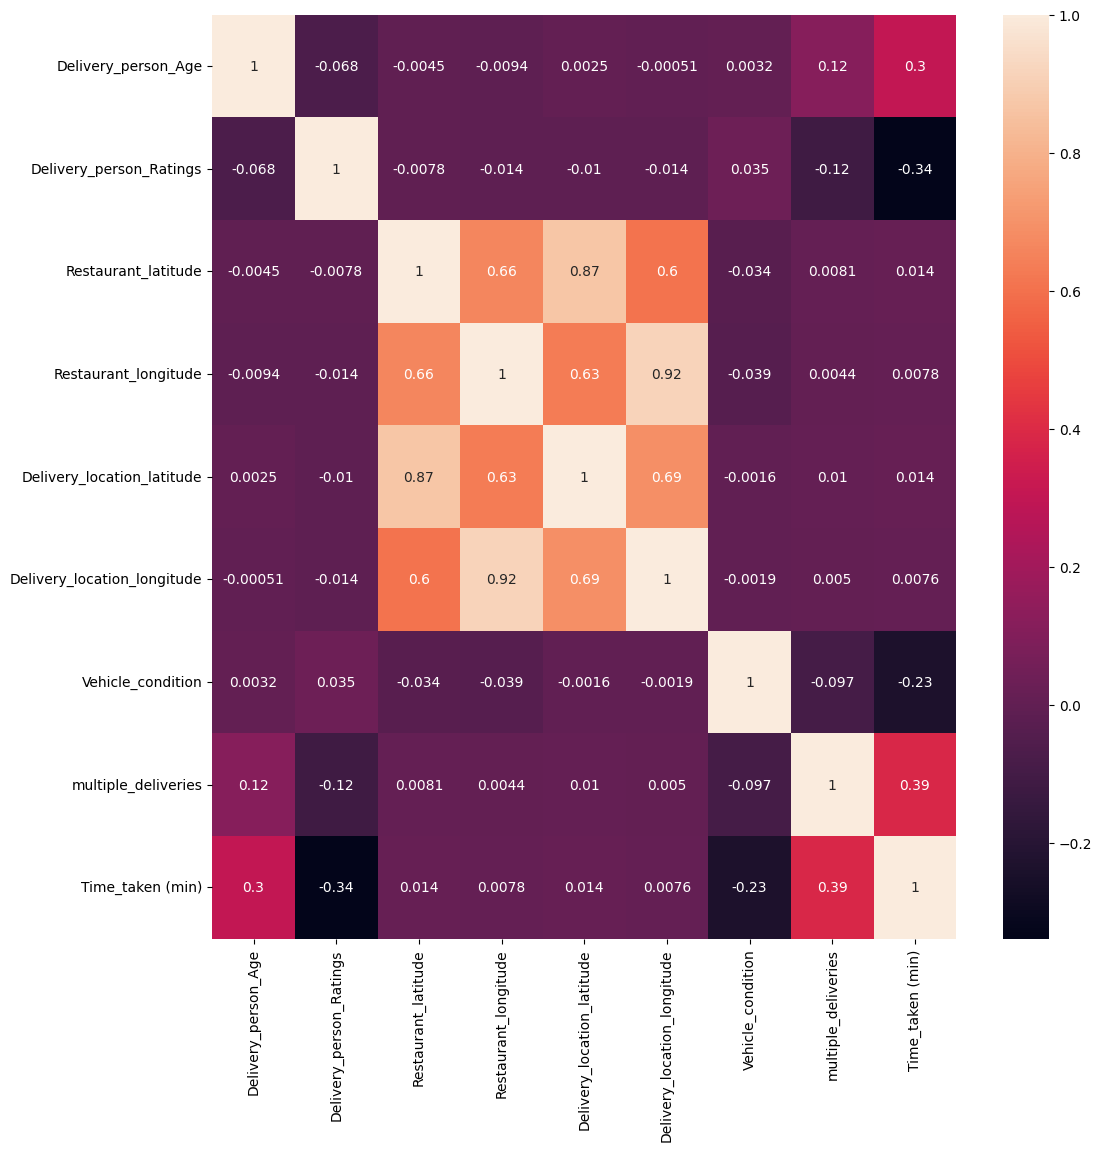

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_features].corr(), annot=True)

#### Observation


<p>There is a high correlation observed between delivery_location_latitude and restaurant_latitude, the delivery_location_longitue and restaurant_longitude</p>

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


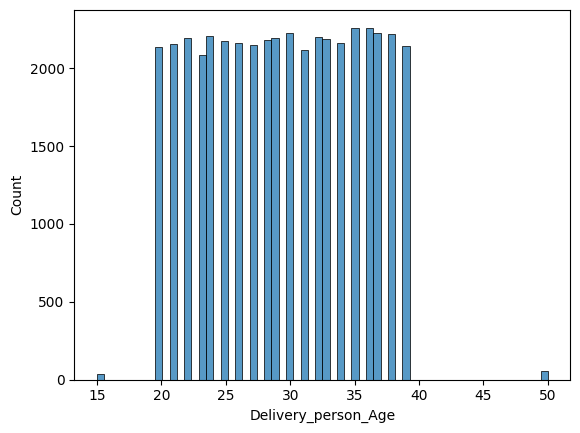

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


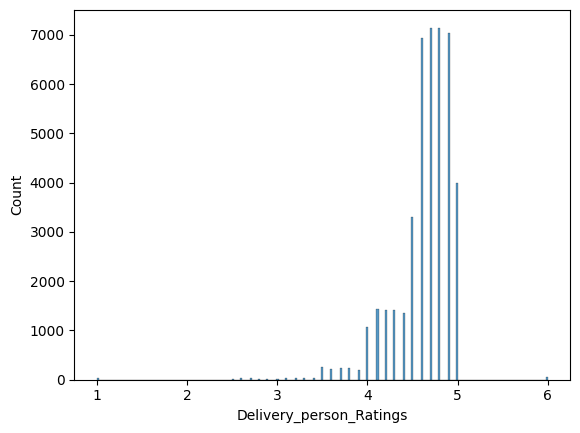

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


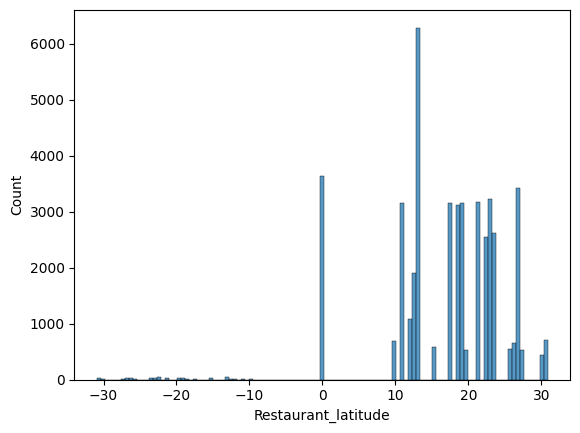

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


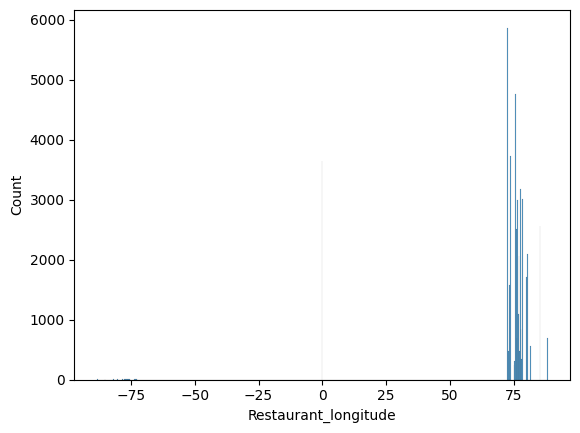

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


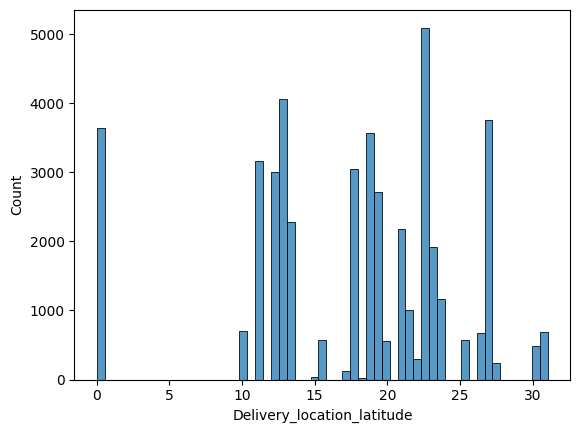

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


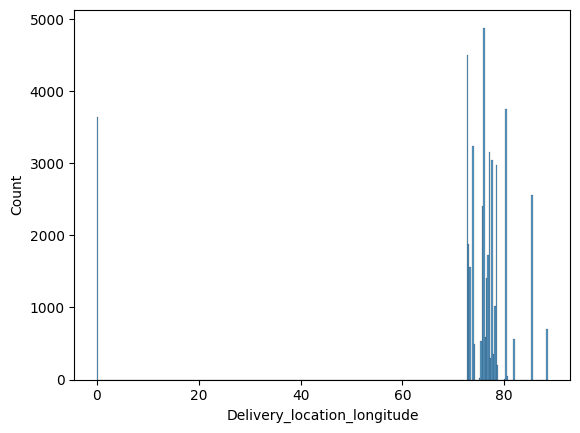

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


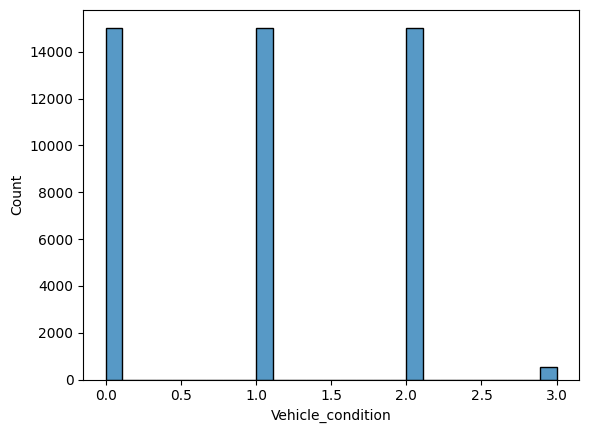

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


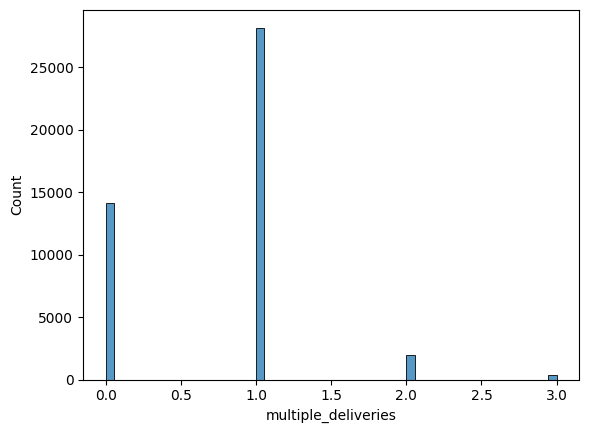

/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/macbookpro/Desktop/time_regress/myEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


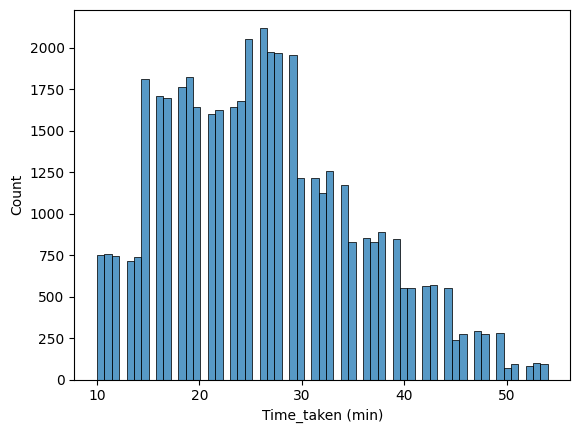

In [10]:
for i in num_features:
    sns.histplot(data=df, x=i)
    plt.show()

In [11]:
df[num_features].isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
multiple_deliveries             993
Time_taken (min)                  0
dtype: int64

## There are missing values both in the categorical features and in the numerical features